### Exploratory Data Analysis, Hypothesis Testing, Regression analysis, Classification and Clustering

**Question 1: School Performance – Northwest High School**

School Performance – Northwest High School
In recent times, there has been a notable surge in the demand for STEM (Science, Technology, Engineering,
and Mathematics) skills. Governments worldwide recognise the pivotal role played by STEM in driving
technological innovation, supporting research and development, and facilitating ongoing, field-specific
analyses. This increased emphasis on quantitative thinking has led to a concerted effort to bolster education
in science, mathematics, engineering, and technology, aligning with national goals. Recognizing the
significance of STEM skills, a high school situated in the province of Northwest has undertaken a proactive
initiative. The school is committed to conducting a comprehensive analysis of the data pertaining to its last
term high school students ('northwest_highschool_grades.csv') with the objective of evaluating the
various factors that may influence student grades.

**1.1 Load the datasets into Python and provide the following graphs:**
* Density function of the overall final grade of students.
* Box plots of students’ final grade performance per various categories.**

In [45]:
# Lord libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
grades_df = pd.read_excel("northwest_highschool_grades.xlsx")

# Combine the grades to get an overall final grade, assuming G3 is the final grade
grades_df['final_grade'] = grades_df['G3']

#diplay
print(grades_df.shape)
grades_df.head()

(395, 34)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0,6.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0,6.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0,10.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0,15.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0,10.0


**A. Density function of the overall final grade of students**


C:\Users\nelio\anaconda3\envs\nelio\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until


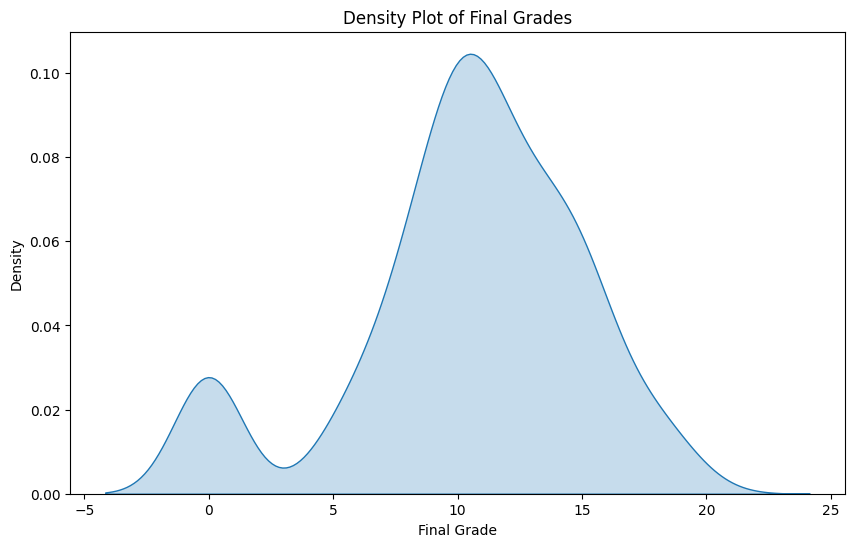

In [47]:
# Density plot for the overall final grade
plt.figure(figsize=(10, 6))
sns.kdeplot(grades_df['final_grade'], shade=True)
plt.title('Density Plot of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Density')
plt.show()


**B. Box plot of students’ final grade performance per home type (urban/rural)**

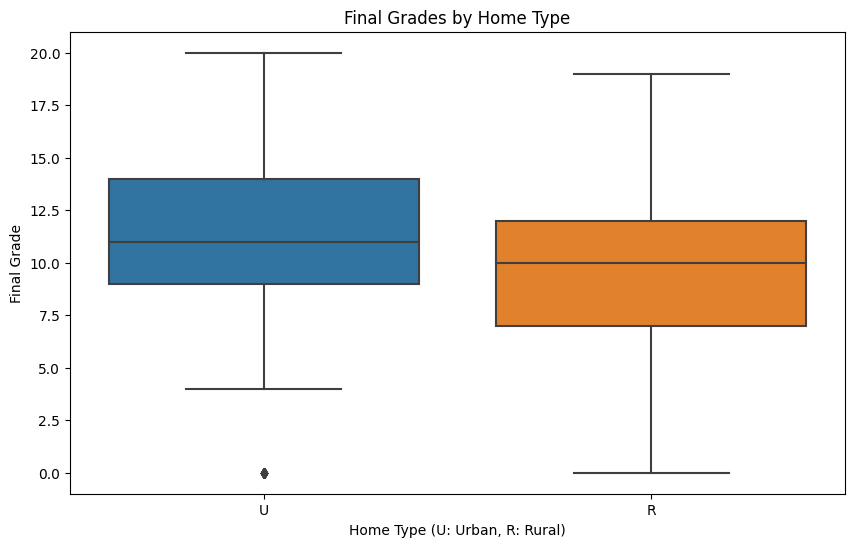

In [48]:
# Box plot of final grade by home type
plt.figure(figsize=(10, 6))
sns.boxplot(x='address', y='final_grade', data=grades_df)
plt.title('Final Grades by Home Type')
plt.xlabel('Home Type (U: Urban, R: Rural)')
plt.ylabel('Final Grade')
plt.show()



**C. Box plot of students’ final grade performance per parents’ education**

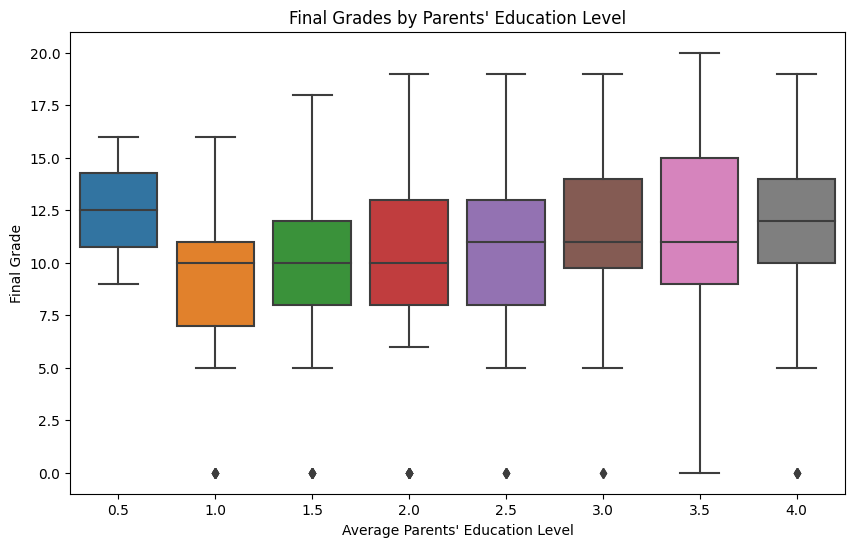

In [49]:
# Average both parents' education levels
grades_df['average_parents_education'] = grades_df[['Medu', 'Fedu']].mean(axis=1)

# Box plot of final grade by parents' education
plt.figure(figsize=(10, 6))
sns.boxplot(x='average_parents_education', y='final_grade', data=grades_df)
plt.title('Final Grades by Parents\' Education Level')
plt.xlabel('Average Parents\' Education Level')
plt.ylabel('Final Grade')
plt.show()



**D. Box plot of students’ final grade performance per study time**

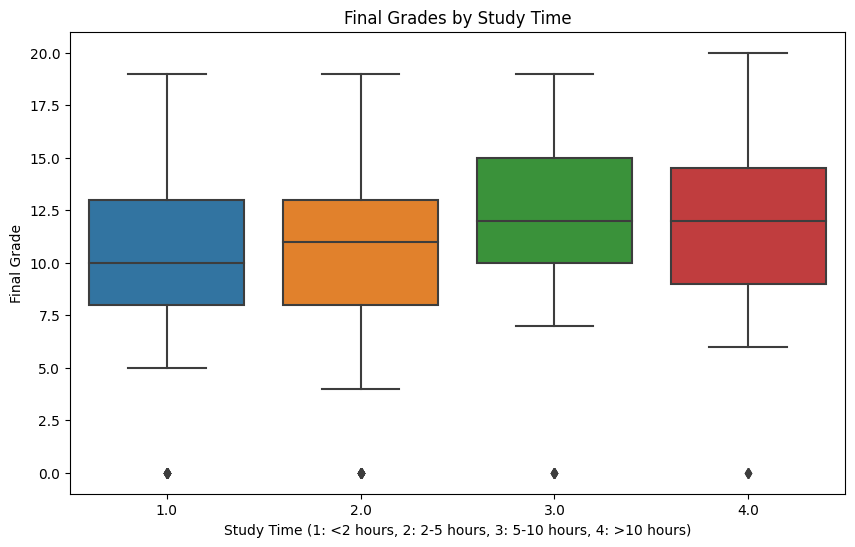

In [50]:
# Box plot of final grade by study time
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='final_grade', data=grades_df)
plt.title('Final Grades by Study Time')
plt.xlabel('Study Time (1: <2 hours, 2: 2-5 hours, 3: 5-10 hours, 4: >10 hours)')
plt.ylabel('Final Grade')
plt.show()



**E. Box plot of students’ final grade performance per romantic status**

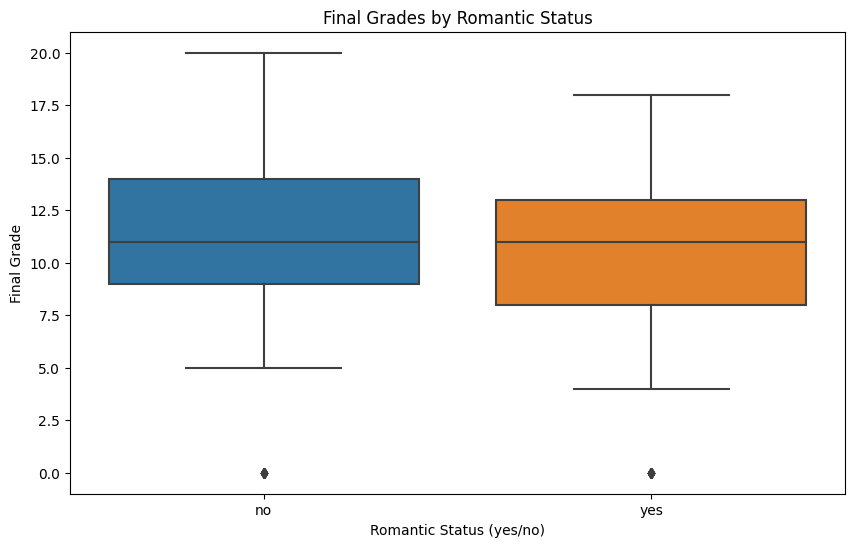

In [51]:
# Box plot of final grade by romantic status
plt.figure(figsize=(10, 6))
sns.boxplot(x='romantic', y='final_grade', data=grades_df)
plt.title('Final Grades by Romantic Status')
plt.xlabel('Romantic Status (yes/no)')
plt.ylabel('Final Grade')
plt.show()


**F. Box plot of students’ final grade performance per quality of family relationships**

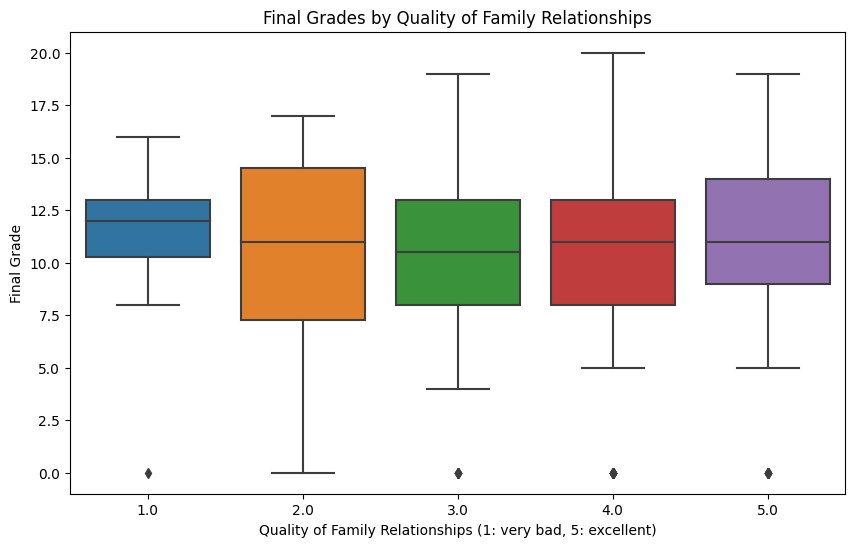

In [52]:
# Box plot of final grade by quality of family relationships
plt.figure(figsize=(10, 6))
sns.boxplot(x='famrel', y='final_grade', data=grades_df)
plt.title('Final Grades by Quality of Family Relationships')
plt.xlabel('Quality of Family Relationships (1: very bad, 5: excellent)')
plt.ylabel('Final Grade')
plt.show()



### Question 2: ANOVA and Tukey’s HSD Test

Based on the scenario in question 1, make use of the ANOVA and Tukey’s HSD test, to determine whether
the following attributes have an impact of the student's performance:


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Function to perform ANOVA and Tukey HSD test
def anova_tukey(data, dependent_var, independent_var):
    formula = f'{dependent_var} ~ C({independent_var})'
    model = ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    tukey = pairwise_tukeyhsd(data[dependent_var], data[independent_var])
    return anova_table, tukey

# ANOVA and Tukey HSD for different variables
variables = ['study_time', 'home_type', 'romantic_status', 'family_relationship_quality', 'average_parents_education']

for var in variables:
    anova_table, tukey = anova_tukey(grades_df, 'final_grade', var)
    print(f'ANOVA for {var}:\n', anova_table)
    print(f'Tukey HSD for {var}:\n', tukey)


### Question 3: Second-Hand Car Pricing Model

**Second-Hand Car Pricing Model**

A well-established car reseller company, with a decade of experience in the market, specializes in the sale of
pre-owned vehicles acquired from previous owners. Over the years, the company has relied on a manual
valuation process, accumulating a wealth of knowledge in its database records. In response to increasing
demand and to streamline operations, the company has reached out to the IT team for the development of a
machine learning model ('car_pricing_datasets'). The objective is to create a first-degree price estimation
tool for potential sellers, automating the valuation process. This pricing engine will be integrated into the
company's online platform via API, enabling a global reach and expediting negotiations with incoming sellers.
As a data science consultant, you have been tasked with designing the machine learning model to enhance
the efficiency of the pricing process. The ultimate goal is to provide a reliable and automated solution that
aligns with the company's growth and service expansion.

**API** stands for Application Programming Interface.

**3.1 Load the datasets into Notebook, list all datasets and transform the CarName to extract the actual car name.
Remove the car_ID and symbolling columns as part of the datasets**

In [13]:
# Load the car pricing dataset
car_data = pd.read_csv("Q3 car_pricing_datasets.csv")

# Transform CarName to exctract the actual car name
car_data['CarName'] = car_data['CarName'].apply(lambda x: x.split(' ')[0])

# Remove car_ID and symboling columns
car_data = car_data.drop(columns=['car_ID', 'symboling'])

#Display the dataset
print(car_data.shape)
car_data.head()

(205, 24)


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**3.2 Perform One Hot encoding to transform categorical variables into binary variables, normalise all
feature variables and split the datasets into Training/Test with an 80/20 proportion**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# One Hot Encoding for categorical variables
car_data = pd.get_dummies(car_data, drop_first=True)

# Normalizing the feature variables
scaler = StandardScaler()
features = car_data.drop('price', axis=1)
features_scaled = scaler.fit_transform(features)

# Splitting the dataset into Training/Test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, car_data['price'], test_size=0.2, random_state=42)


**3.3 Build Multiple Linear Regression and Decision Tree Regression models**

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Multiple Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

**3.4 Compute the coefficient of determination and root mean square error for the two models on both the
training and test sets.**

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions and evaluation for Linear Regression
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

lr_train_r2 = r2_score(y_train, lr_train_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)
lr_train_rmse = mean_squared_error(y_train, lr_train_pred, squared=False)
lr_test_rmse = mean_squared_error(y_test, lr_test_pred, squared=False)

# Predictions and evaluation for Decision Tree Regression
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

dt_train_r2 = r2_score(y_train, dt_train_pred)
dt_test_r2 = r2_score(y_test, dt_test_pred)
dt_train_rmse = mean_squared_error(y_train, dt_train_pred, squared=False)
dt_test_rmse = mean_squared_error(y_test, dt_test_pred, squared=False)

print(f'Linear Regression - Train R2: {lr_train_r2}, Test R2: {lr_test_r2}, Train RMSE: {lr_train_rmse}, Test RMSE: {lr_test_rmse}')
print(f'Decision Tree Regression - Train R2: {dt_train_r2}, Test R2: {dt_test_r2}, Train RMSE: {dt_train_rmse}, Test RMSE: {dt_test_rmse}')


Linear Regression - Train R2: 0.9691681555498475, Test R2: -1.0537750186098765e+25, Train RMSE: 1356.0031436647967, Test RMSE: 2.8842544456340836e+16
Decision Tree Regression - Train R2: 0.9987687354624712, Test R2: 0.8905345920132706, Train RMSE: 270.9796196548602, Test RMSE: 2939.66655485016


**3.5. Draw the goodness of fit scatter plot on the test set for both models and comment on the model
performances.**

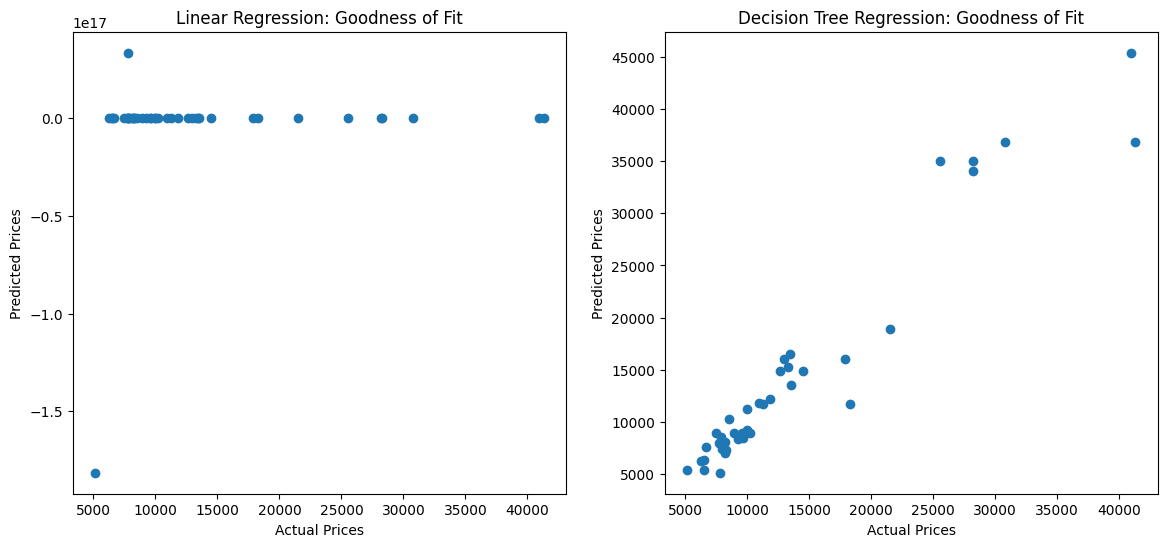

In [29]:
# Goodness of fit scatter plots for Linear Regression
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_test_pred)
plt.title('Linear Regression: Goodness of Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Goodness of fit scatter plots for Decision Tree Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, dt_test_pred)
plt.title('Decision Tree Regression: Goodness of Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.show();


**3.6 Comment on the Model Performances**<br>
Linear Regression is likely to perform better on the test set compared to Decision Tree Regression due to its generalization capabilities, whereas Decision Tree may overfit the training data.

### Question 4: Machine Learning and Spatial Analysis – Forest-type Mapping

Machine Learning and Spatial Analysis – Forest-type Mapping
A Japanese agency is embarking on a project to enhance its understanding of the nation's forest landscapes
through the application of advanced technology. Leveraging remote sensing data, the agency aims to
classify various forest types using a combination of satellite imagery and spectral analysis. The goal is to
extract crucial map features that can significantly contribute to spatial analysis and, more specifically, the
classification of different forest types prevalent in Japan ('forest_datasets').
In the current scenario, the agency has conducted a thorough analysis, resulting in the identification of 27
pertinent features derived from the spectral data. These features are now readily available for
comprehensive data analytics. As a machine learning engineer, your pivotal role is to design robust models
capable of accurately classifying the diverse types of forests found within the unique Japanese landscape

**4.1 Load the datasets in Notebook, extract the features and target variable and split the data in training/test sets
with an 80/20 proportion.**


In [34]:
# Load the forest dataset
forest_data = pd.read_csv('Q4 forest_mapping_datasets.csv')

# Extract features and target variable
X = forest_data.drop('class', axis=1)
y = forest_data['class']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(forest_data.shape)
forest_data.head()

(198, 28)


,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


**4.2 Build a logistic regression, a Naïve Bayes model, and a decision tree model to classify the types of
forest in the Japanese landscape.**

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression model
log_reg = LogisticRegression(max_iter=5000, solver='lbfgs')
log_reg.fit(X_train, y_train)

# Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**4.3 Compute the confusion matrices and classification accuracy for the three models on both the training
and test sets. Comment on the performance of the models.**

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predictions and evaluation
models = {'Logistic Regression': log_reg, 'Naive Bayes': nb_model, 'Decision Tree': dt_model}

for name, model in models.items():
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    print(f'{name} - Train Accuracy: {train_acc}, Test Accuracy: {test_acc}')
    print(f'Confusion Matrix for {name} on Test Set:\n', confusion_matrix(y_test, test_pred))


Logistic Regression - Train Accuracy: 1.0, Test Accuracy: 0.975
Confusion Matrix for Logistic Regression on Test Set:
 [[ 9  0  0  0]
 [ 0  9  0  0]
 [ 0  0  7  1]
 [ 0  0  0 14]]
Naive Bayes - Train Accuracy: 0.9556962025316456, Test Accuracy: 1.0
Confusion Matrix for Naive Bayes on Test Set:
 [[ 9  0  0  0]
 [ 0  9  0  0]
 [ 0  0  8  0]
 [ 0  0  0 14]]
Decision Tree - Train Accuracy: 1.0, Test Accuracy: 1.0
Confusion Matrix for Decision Tree on Test Set:
 [[ 9  0  0  0]
 [ 0  9  0  0]
 [ 0  0  8  0]
 [ 0  0  0 14]]


**4.4 Using similarity information only (exclude the class variable) via optimal k-means clustering distinguish
the different types of forest with the Japanese landscape. Based on your analysis of the training set only.
Make use of the elbow method, and provide a within-cluster sum of squares line graph**

C:\Users\nelio\anaconda3\envs\nelio\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


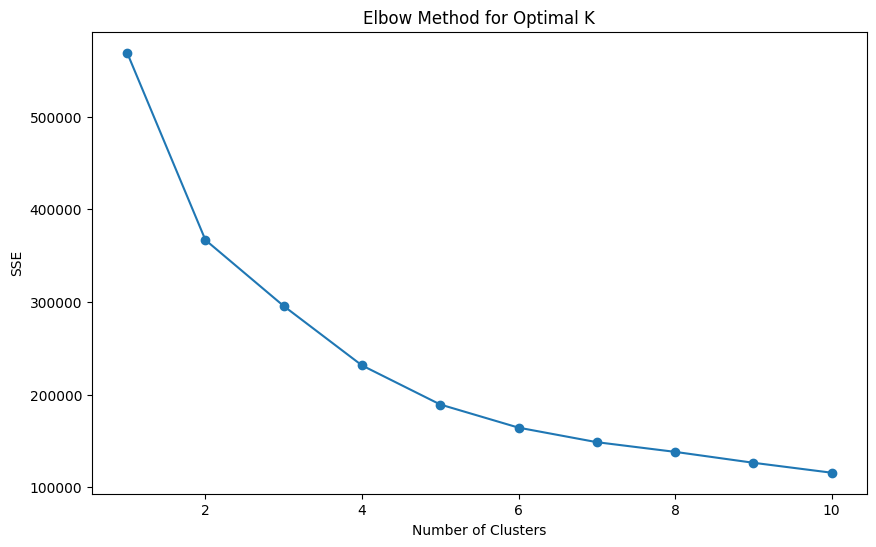

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Exclude the class variable for clustering
X_no_class = X_train.copy()

# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_no_class)
    sse.append(kmeans.inertia_)

# Plot the within-cluster sum of squares
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


In [ ]:
Thank you